# Question 2:
- Farmers are getting to know about the F4F program from social media and some other means.
- These farmers call back to our call center.
- This attached data consists of dummy data similar to a small portion from call center data.
- How can we obtain some numerical insights from the data including comments which will help us to better understand the data.

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("q2_data.xlsx - Data.csv")
df

,S.N.,Date,Reference/From where did they come to know about us?,comments
0,1,25-April-2024,Whatsapp,Want Sadalwood plants
1,2,26-April-2024,Instagram,Interested to Agroforestry but Not decided fruits
2,3,26-April-2024,Peer to Peer,Interested to Agroforestry but Not decided fruits
3,4,27-April-2024,Poster/Flyer,Interested to Agroforestry but Not decided fruits
4,5,27-April-2024,Whatsapp,Mango And Sitaphal
...,...,...,...,...
3109,3303,24-Jan-2025,Instagram,Interested Farmer
3110,3304,24-Jan-2025,Instagram,Called to get information about F4F
3111,3305,24-Jan-2025,Instagram,Called to get information about F4F
3112,3306,24-Jan-2025,Instagram,Mango


In [3]:
df.rename(columns={'Reference/From where did they come to know about us?': 'Reference'}, inplace=True)
df

,S.N.,Date,Reference,comments
0,1,25-April-2024,Whatsapp,Want Sadalwood plants
1,2,26-April-2024,Instagram,Interested to Agroforestry but Not decided fruits
2,3,26-April-2024,Peer to Peer,Interested to Agroforestry but Not decided fruits
3,4,27-April-2024,Poster/Flyer,Interested to Agroforestry but Not decided fruits
4,5,27-April-2024,Whatsapp,Mango And Sitaphal
...,...,...,...,...
3109,3303,24-Jan-2025,Instagram,Interested Farmer
3110,3304,24-Jan-2025,Instagram,Called to get information about F4F
3111,3305,24-Jan-2025,Instagram,Called to get information about F4F
3112,3306,24-Jan-2025,Instagram,Mango


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   S.N.       3114 non-null   int64 
 1   Date       3114 non-null   object
 2   Reference  3114 non-null   object
 3   comments   3114 non-null   object
dtypes: int64(1), object(3)
memory usage: 97.4+ KB


In [5]:
x = [df['Date'].value_counts()]

## Looking for daily call count 
 - The pandas value_count function gives you the distinct values
 - The dataset contains No Null values
 - data is in text format hense we cannot perform statestical EDA

In [6]:
for i in range(len(x)):
    print(x)

[Date
27-Jun-2024      65
23-May-2024      63
24-Jun-2024      62
26-Jun-2024      60
25-Jun-2024      56
                 ..
3 June 2004       1
16-Nov-2024       1
21-Nov-2024       1
28-Nov-2024       1
25-April-2024     1
Name: count, Length: 204, dtype: int64]


In [7]:
from datetime import datetime
# for uniformity in text we are going to lowecase the text 
def lowering(text):
    return text.lower()

# There are few few different entries for date column 
# To make same pattern below function works
def shorten_months(date_str):
    month_mapping = {
        "january": "jan",
        "february": "feb",
        "march": "mar",
        "april": "apr",
        "may": "may",
        "june": "jun",
        "july": "jul",
        "august": "aug",
        "september": "sep",
        "october": "oct",
        "november": "nov",
        "december": "dec"
    }
    
    date_str = date_str.lower()
    
    for full_month, short_month in month_mapping.items():
        date_str = date_str.replace(full_month, short_month)
        date_str = date_str.replace(" ", "-")
        date_str = date_str.replace("2004", "2024")
    
    return date_str
# this function uses the method strptime of datetime package
# Which is used to convert the string in date format
def date_format(string):
    date_format = "%d-%b-%Y"  
    result_datetime = datetime.strptime(string, date_format)
    return result_datetime
# this function uses the method day_name of datetime package
# Which is used to to find the Day of week for that perticular date
def week_day(date):
    day_of_week = date.day_name() 
    return day_of_week
    
df['Date'] = df['Date'].apply(lowering)
df['Date'] = df['Date'].apply(shorten_months)
df['date'] = df['Date'].apply(date_format)
df['Day'] = df['date'].apply(week_day)
df

,S.N.,Date,Reference,comments,date,Day
0,1,25-apr-2024,Whatsapp,Want Sadalwood plants,2024-04-25,Thursday
1,2,26-apr-2024,Instagram,Interested to Agroforestry but Not decided fruits,2024-04-26,Friday
2,3,26-apr-2024,Peer to Peer,Interested to Agroforestry but Not decided fruits,2024-04-26,Friday
3,4,27-apr-2024,Poster/Flyer,Interested to Agroforestry but Not decided fruits,2024-04-27,Saturday
4,5,27-apr-2024,Whatsapp,Mango And Sitaphal,2024-04-27,Saturday
...,...,...,...,...,...,...
3109,3303,24-jan-2025,Instagram,Interested Farmer,2025-01-24,Friday
3110,3304,24-jan-2025,Instagram,Called to get information about F4F,2025-01-24,Friday
3111,3305,24-jan-2025,Instagram,Called to get information about F4F,2025-01-24,Friday
3112,3306,24-jan-2025,Instagram,Mango,2025-01-24,Friday


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   S.N.       3114 non-null   int64         
 1   Date       3114 non-null   object        
 2   Reference  3114 non-null   object        
 3   comments   3114 non-null   object        
 4   date       3114 non-null   datetime64[ns]
 5   Day        3114 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 146.1+ KB


In [9]:
df.describe()

,S.N.,date
count,3114.000000,3114
mean,1617.644830,2024-07-24 01:16:18.034682112
min,1.000000,2024-04-25 00:00:00
25%,841.250000,2024-06-05 00:00:00
50%,1619.500000,2024-07-03 00:00:00
75%,2398.750000,2024-08-30 00:00:00
max,3307.000000,2025-01-24 00:00:00
std,918.055532,NaN


### Day wise enquiries 
    (day_counts =df['Day'].value_counts())
    Day
    Monday       641
    Friday       543
    Wednesday    541
    Thursday     497
    Tuesday      470
    Saturday     419
    Sunday         3
    Name: count, dtype: int64

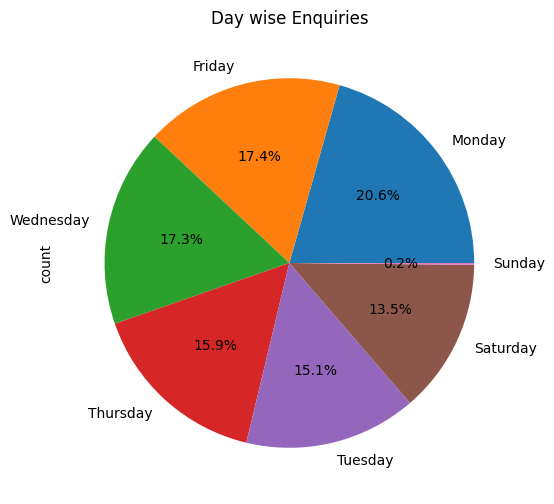

In [10]:
day_counts =df['Day'].value_counts()
plt.figure(figsize=(8, 6))
day_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Day wise Enquiries')
plt.show()

In [11]:
df['Reference'].value_counts()

Reference
Instagram                  1582
Facebook                    534
Stall /program/Function     309
Whatsapp                    308
Youtube/Google              167
Peer to Peer                117
F4F_Team                     63
Poster/Flyer                 18
Fb                            6
other                         6
Youtube                       3
Insta                         1
Name: count, dtype: int64

# Note :
### There are 20 entries of year 2004 which I think wrong entered
    - So I am replacing this with 2024 (At staring Function)
    - date
    - 2004      20
    - 2024    2998
    - 2025      96
    Name: S.N., dtype: int64
### There are few records which are similar but written differently 
    - I am combinin them together 
    - Reference
    - Instagram                  1582
    - Facebook                    534
    - Stall /program/Function     309
    - Whatsapp                    308
    - Youtube/Google              167
    - Peer to Peer                117
    - F4F_Team                     63
    - Poster/Flyer                 18
    - Fb                            6
    - other                         6
    - Youtube                       3
    - Insta                         1


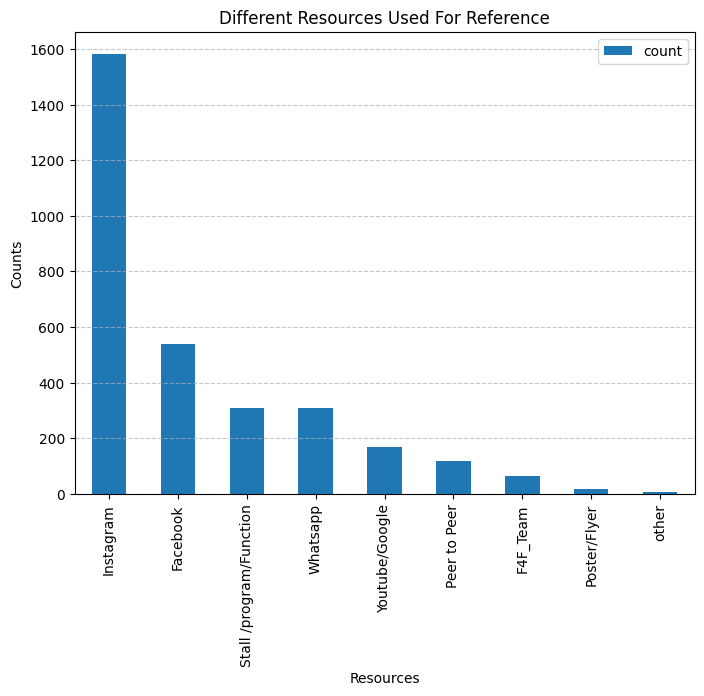

In [12]:
def replace_Reference(string):
    if string == "Fb":
        string = "Facebook"
    elif string == "Youtube":
        string = "Youtube/Google"
    elif string == "Insta":
        string = "Instagram"
    return string
df['Reference'] = df['Reference'].apply(replace_Reference)
reference = df['Reference'].value_counts()
plt.figure(figsize=(8, 6))
reference.plot(kind='bar')
plt.title('Different Resources Used For Reference')
plt.xlabel('Resources')
plt.ylabel('Counts')
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.legend()
plt.show()

## Monthly analysis of call 
## How many calls come in which month for inquiry
- yearly_summary.index Gives tuple of multiindex (2024, 11)
- yearly_summary.values Gives the value of in 

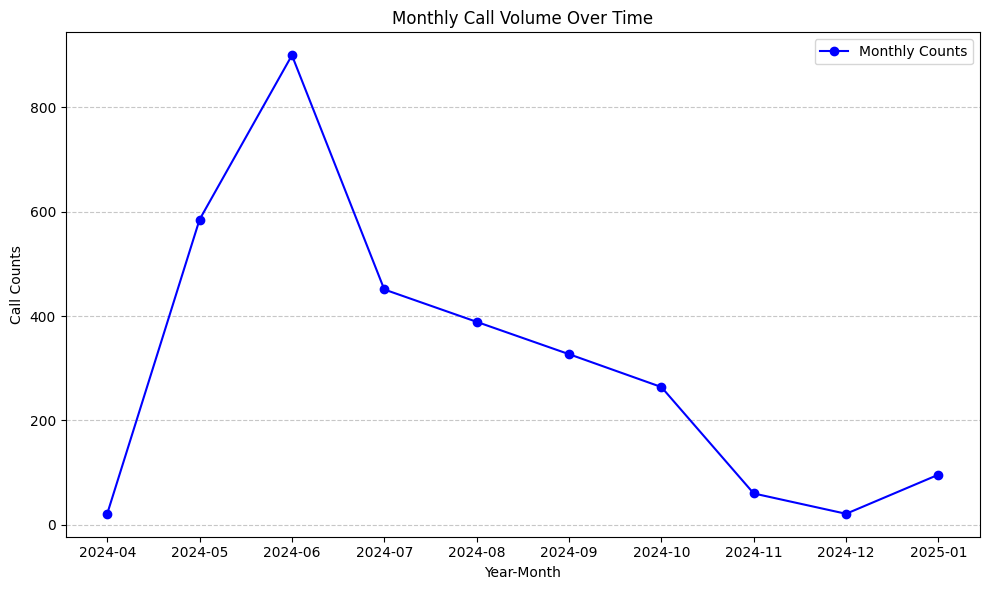

In [13]:
yearly_summary = df.groupby([df['date'].dt.year, df['date'].dt.month])['S.N.'].count()

summary_df = pd.DataFrame({
    'Year-Month': [str(year) + '-' + str(month).zfill(2) for year, month in yearly_summary.index],
    'Count': yearly_summary.values
})

plt.figure(figsize=(10, 6))
plt.plot(summary_df['Year-Month'], summary_df['Count'], marker='o', linestyle='-', color='b', label='Monthly Counts')

plt.title('Monthly Call Volume Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Call Counts')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

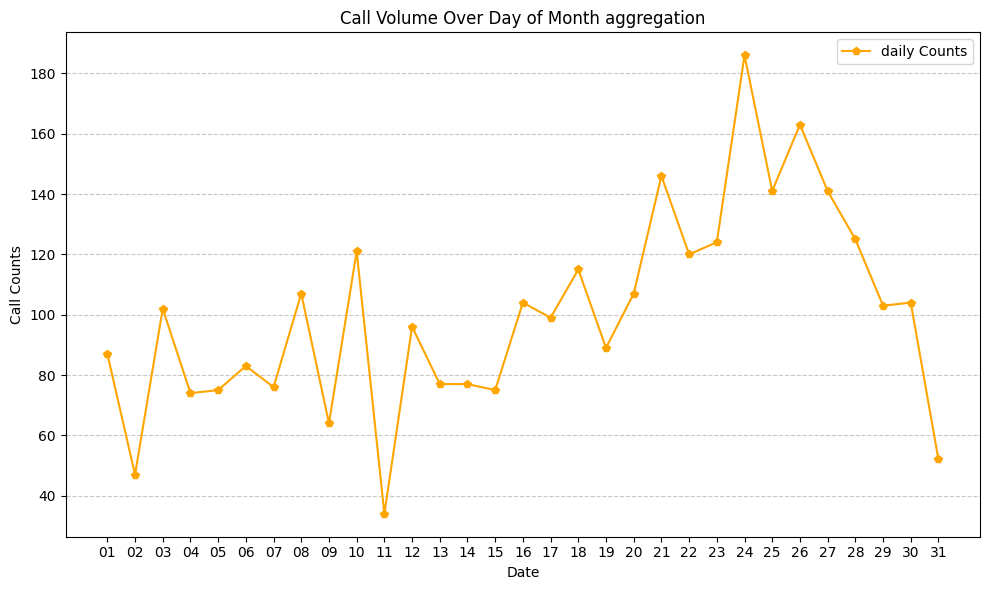

In [14]:
day_of_month = df.groupby(df['date'].dt.day)['S.N.'].count()
day_of_month = pd.DataFrame({
    "Date": [str(idx).zfill(2) for idx in day_of_month.index],
    "Count": day_of_month.values
})
plt.figure(figsize=(10, 6))
plt.plot(day_of_month['Date'], day_of_month['Count'], marker='p', linestyle='-', color='orange', label='daily Counts')

plt.title('Call Volume Over Day of Month aggregation')
plt.xlabel('Date')
plt.ylabel('Call Counts')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

In [15]:
# x = df.groupby(df['Date'])['S.N.'].count() similar output
x = df.groupby([df['date'].dt.year, df['date'].dt.month, df['date'].dt.day])['S.N.'].count()
x = pd.DataFrame({
    'Year-Month-Day': [str(year) + '-' + str(month).zfill(2) + '-' + str(day).zfill(2) for year, month, day in x.index ],
    'Year-Month': [str(year) + '-' + str(month).zfill(2) for year, month, day in x.index],
    'Count': x.values
})
x

,Year-Month-Day,Year-Month,Count
0,2024-04-25,2024-04,1
1,2024-04-26,2024-04,2
2,2024-04-27,2024-04,5
3,2024-04-29,2024-04,5
4,2024-04-30,2024-04,8
...,...,...,...
185,2025-01-16,2025-01,7
186,2025-01-17,2025-01,2
187,2025-01-22,2025-01,2
188,2025-01-23,2025-01,2


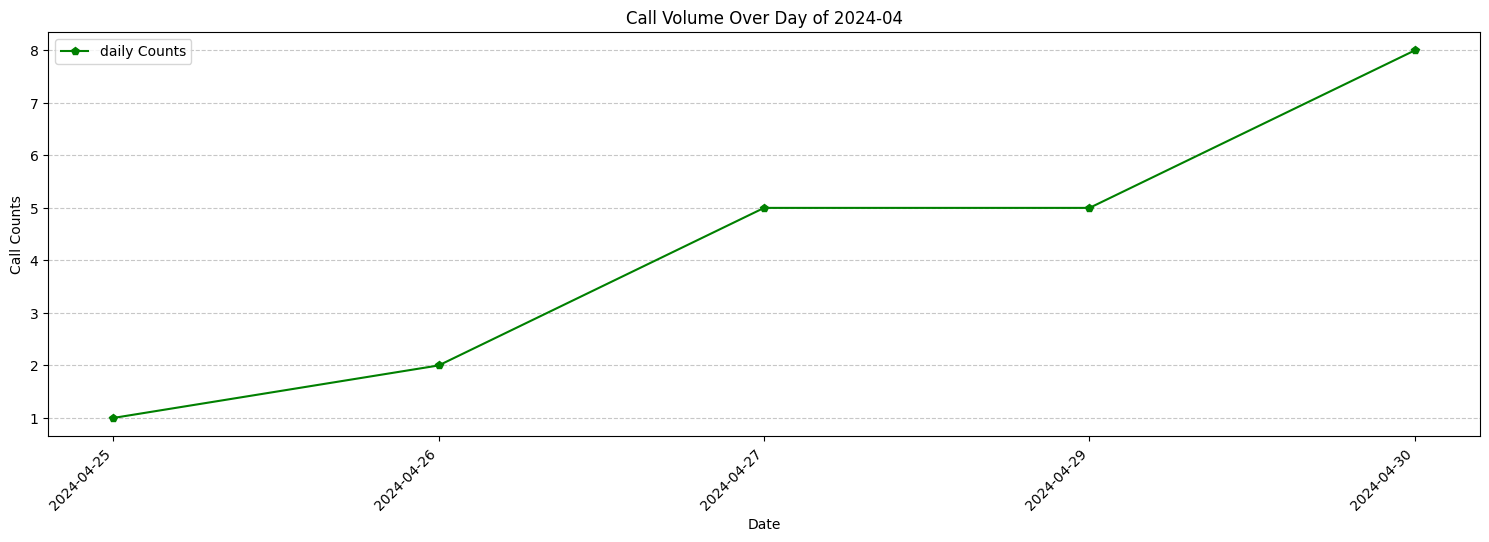

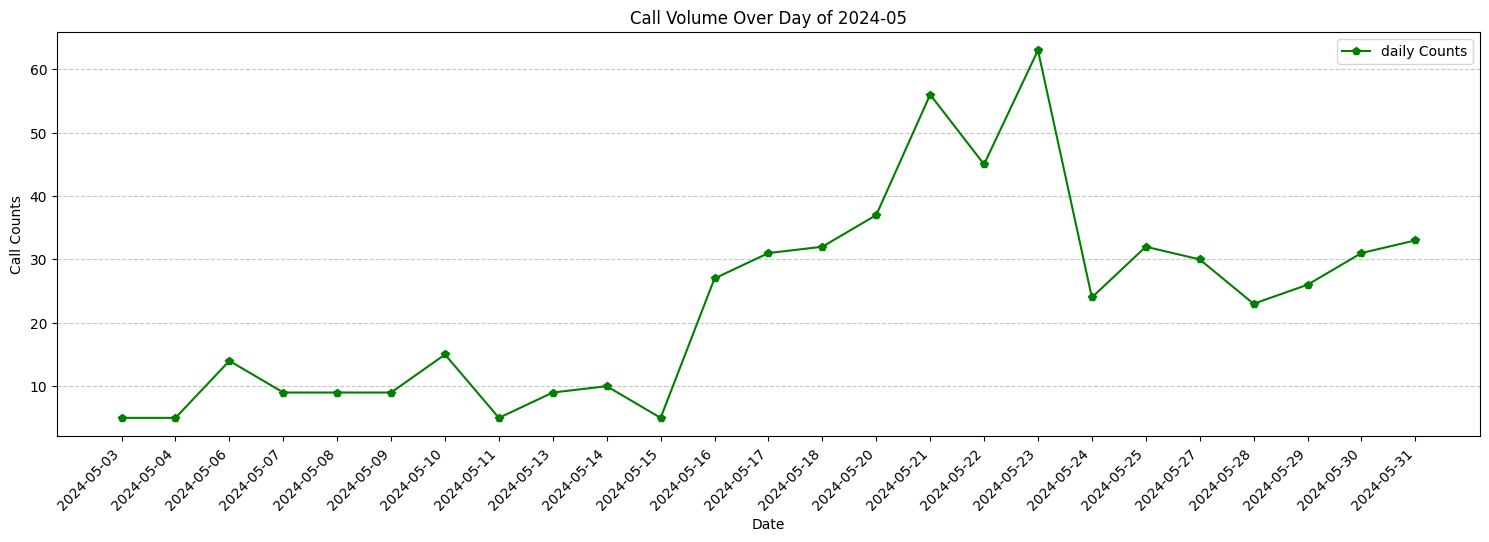

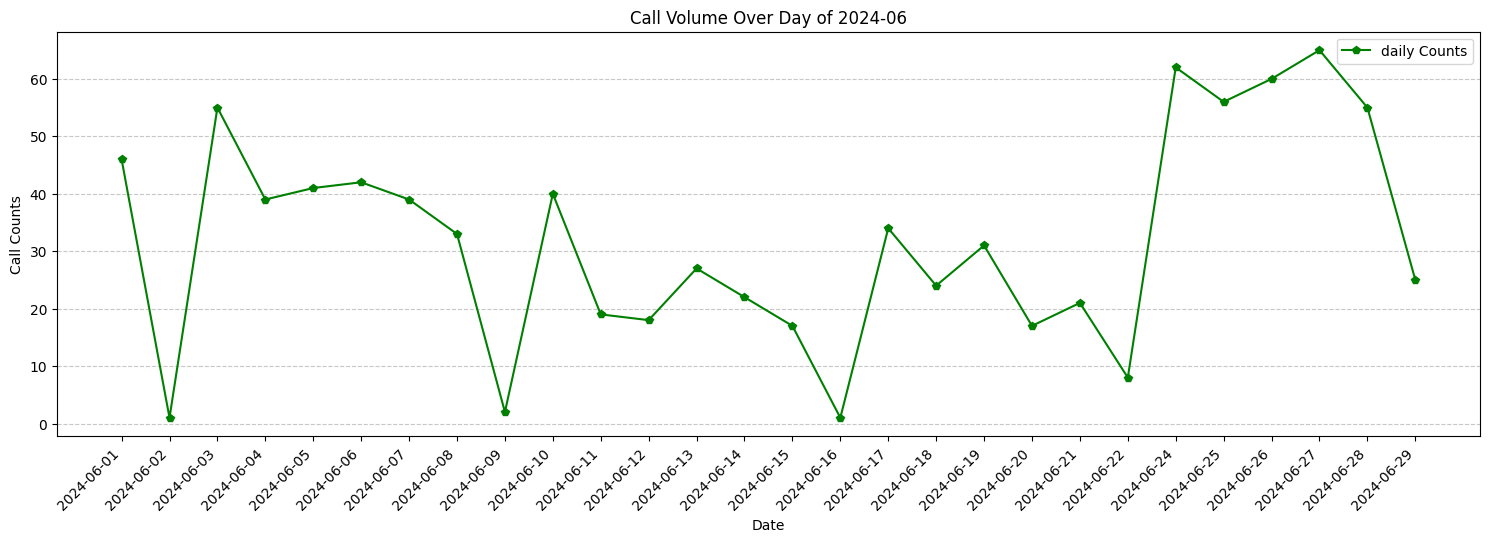

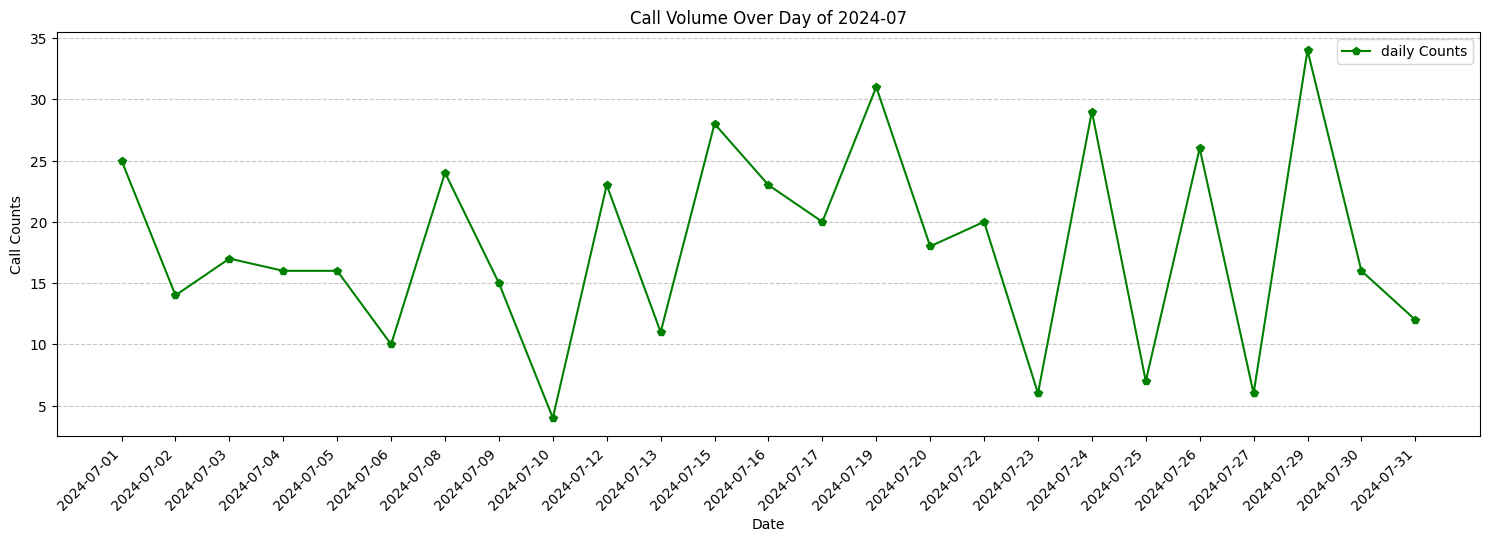

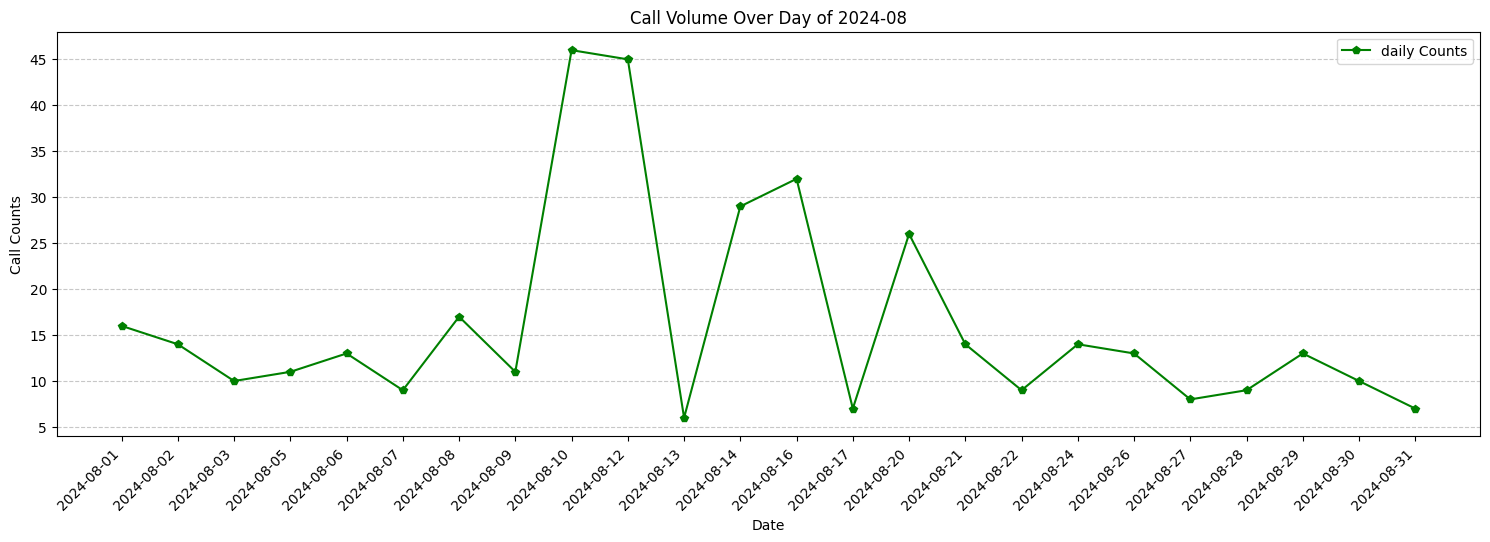

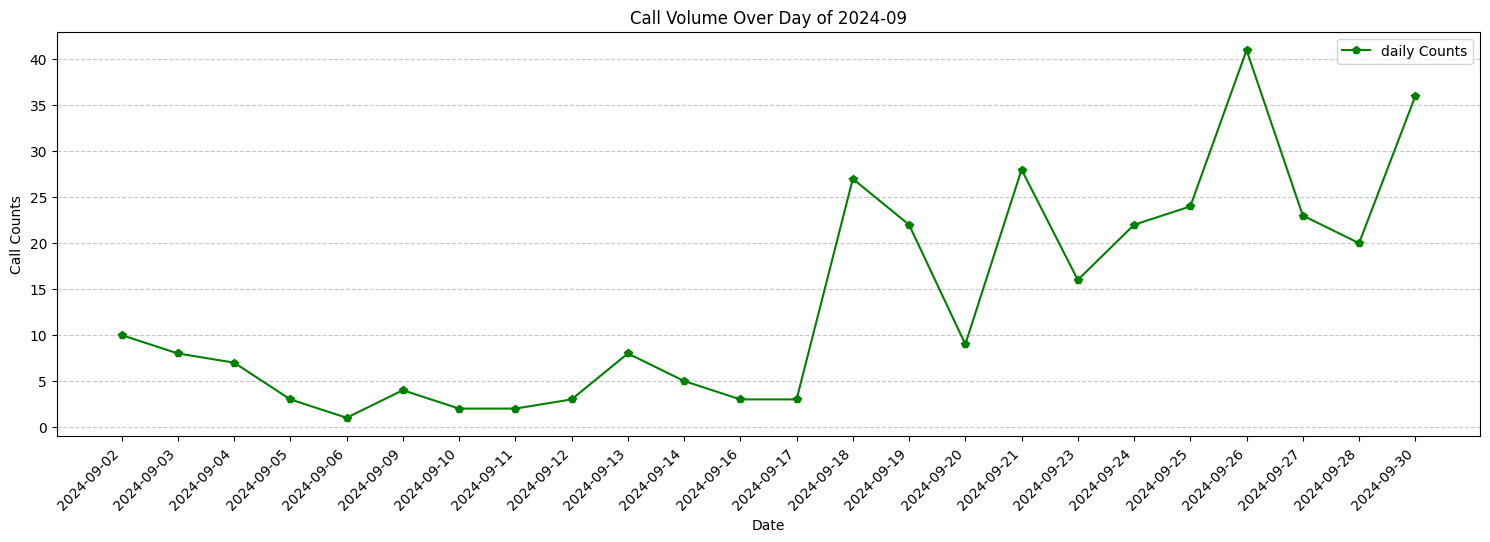

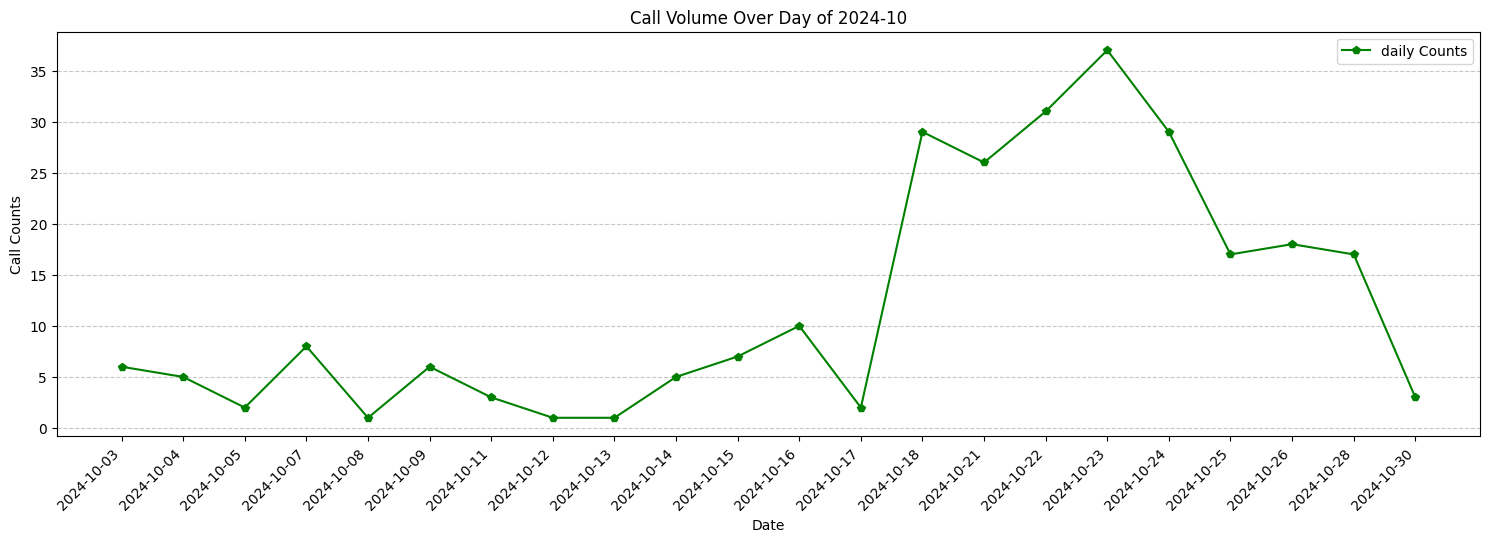

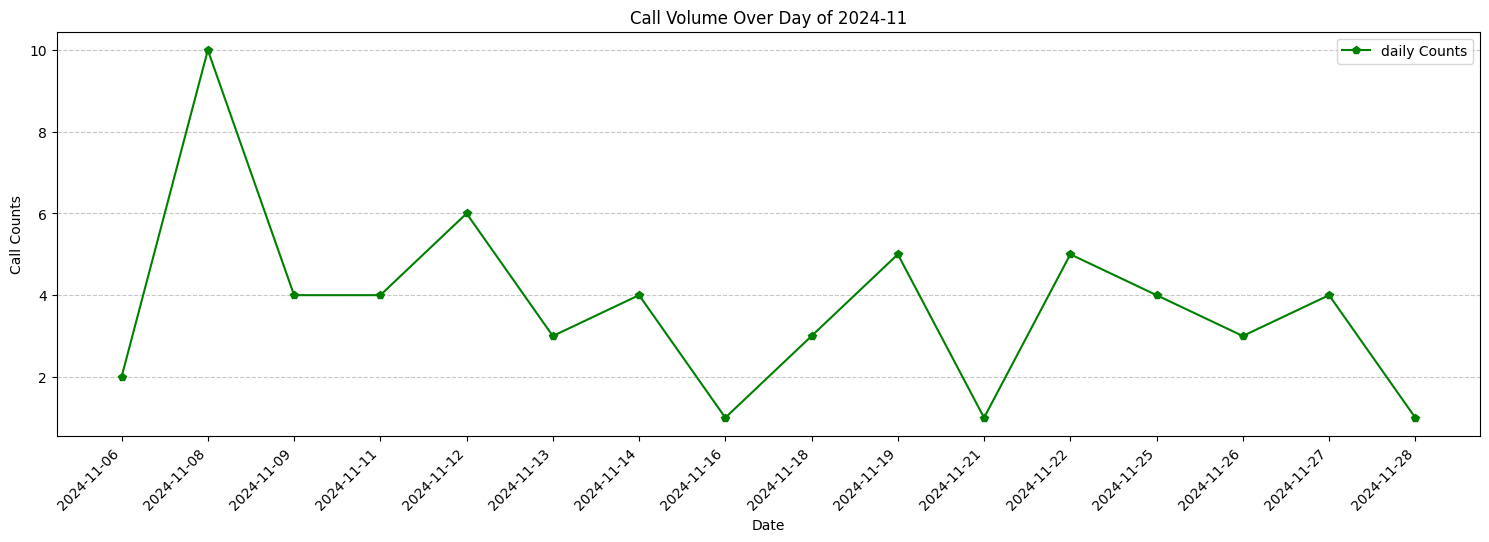

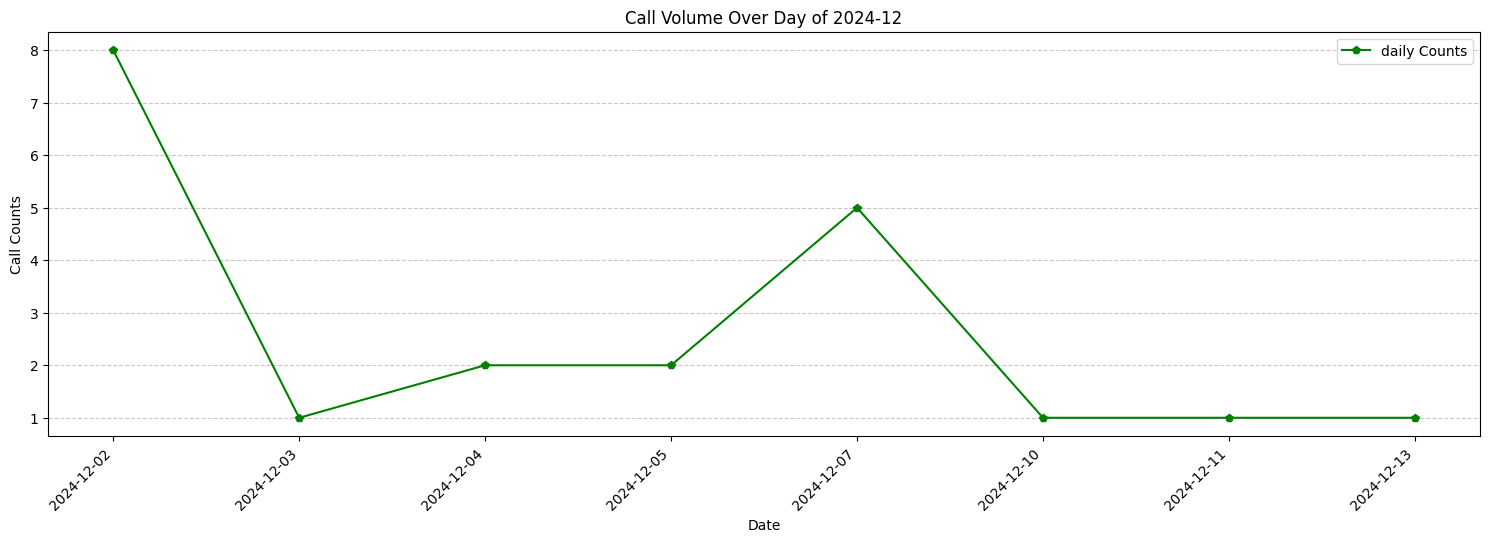

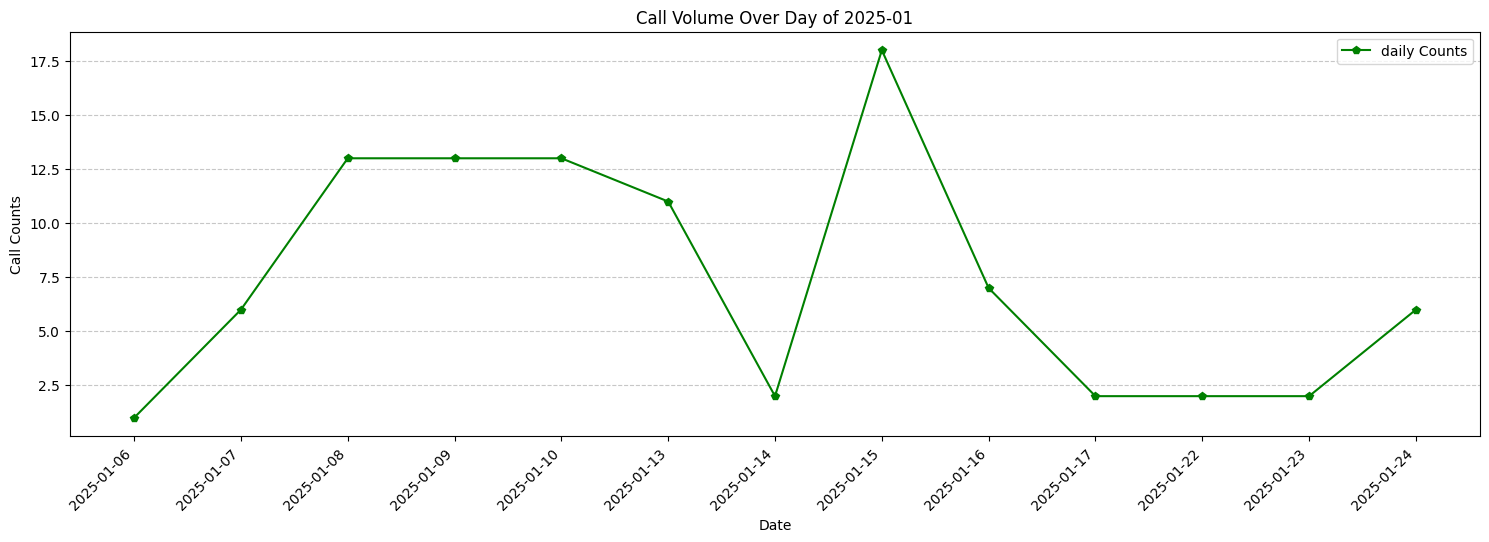

In [16]:
unique_month = x['Year-Month'].unique()
dfs = {month: x[x['Year-Month'] == month] for month in unique_month}
for month, data in dfs.items():
    plt.figure(figsize=(15, 5))
    plt.plot(data['Year-Month-Day'], data['Count'], marker='p', linestyle='-', color='green', label='daily Counts')
    
    plt.title(f'Call Volume Over Day of {month}')
    plt.xlabel('Date')
    plt.ylabel('Call Counts')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.show()


In [17]:
comment_count = df['comments'].value_counts()

# comment_count.index
# comment_count.values
comment_count

comments
Interested Farmer                           763
Mango                                       306
Called to get information about F4F          76
Not Desided                                  71
Guava                                        67
                                           ... 
Partnership Technic Anagic mumbai             1
Sitaphal,Avala                                1
Leamon,Sitaphal                               1
Just want 50 mango plants                     1
25 year old ngo shyog pragati ngo gujrat      1
Name: count, Length: 954, dtype: int64

In [18]:
import re
from collections import Counter

all_comments = ' '.join(df['comments'].dropna()).lower()

words = re.split(r'[^a-z0-9]+', all_comments)
word_counts = Counter(words)
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
word_counts_df


,Word,Count
0,interested,855
1,farmer,850
2,mango,850
3,sitaphal,287
4,to,278
...,...,...
934,seeds,1
935,name,1
936,ishved,1
937,seedfarm,1


## Comment analysis we get to know about
- there are 954 unique comments are there out of 3114
- In which 763 - 855 farmers are showing interest
- Most asked plant is
    - Mango 850+ times
    - guava : 178+ (peru is similar word not inclused in count)
    - Lemon : 155 + (spelling mistakes as well )
    - Jambhul : 123 + 
    - Mosambi : 110 + 
    - Orange : 86 and so on..
  - It seems that non horticulture plant have less demand from farmer side
#### There are 939 unique words including stopwords and spelling mistakes also hinglish words
- we can calculate demand trend for each plant
- For indepth processing we need to use NLP Technology e.g. sentiment analysis